In [275]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [276]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

In [277]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [278]:
df = pd.read_excel('Analysis Data.xlsx', index_col = False)

In [279]:
df.head(5)

,Specimen,b\n( in . ),h\n( in . ),d\n( in . ),#bar,D\n( in . ),ρ ratio,s ( in . ),f'c( pal ),fs( pal ),#\ncracks,Avg Space (in),Avg .\nWidth\n( In . ),Max .\nWidth\n( in . ),30⁰C,40⁰C,50⁰C,60⁰C,70⁰C,80⁰C
0,6-7.5-3-2,7.5,6,5.31,3,0.375,1.476939,2.50,3720,15000.0,1.0,NaN,0.00073,0.00073,NaN,NaN,NaN,NaN,NaN,NaN
1,6-7.5-4-1,7.5,6,5.25,2,0.500,0.962500,3.75,3550,15000.0,1.0,NaN,0.00068,0.00068,NaN,NaN,NaN,NaN,NaN,NaN
2,6-7.5-4-2,7.5,6,5.25,2,0.500,0.962500,3.75,3570,15000.0,2.0,18.25,0.00087,0.00109,0.001455,0.001820,0.002185,0.002550,0.002915,0.003280
3,6-7.5-4-3,7.5,6,5.25,2,0.500,0.962500,3.75,3810,15000.0,4.0,8.87,0.00118,0.00166,0.001837,0.002015,0.002192,0.002370,0.002547,0.002724
4,6-7.5-5-1,7.5,6,5.19,2,0.625,0.940626,3.75,3330,15000.0,9.0,3.89,0.00177,0.00281,0.002888,0.002966,0.003043,0.003121,0.003199,0.003277


In [280]:
df.columns

Index(['Specimen', 'b\n( in . )', 'h\n( in . )', 'd\n( in . )', '#bar',
       'D\n( in . )', 'ρ ratio', 's ( in . )', 'f'c( pal )', 'fs( pal )',
       '#\ncracks', 'Avg Space (in)', 'Avg .\nWidth\n( In . )',
       'Max .\nWidth\n( in . )', '30⁰C', '40⁰C', '50⁰C', '60⁰C', '70⁰C',
       '80⁰C'],
      dtype='object')

In [281]:
df.columns = df.columns.str.replace('\n', '   ').str.strip()

In [282]:
df.columns

Index(['Specimen', 'b   ( in . )', 'h   ( in . )', 'd   ( in . )', '#bar',
       'D   ( in . )', 'ρ ratio', 's ( in . )', 'f'c( pal )', 'fs( pal )',
       '#   cracks', 'Avg Space (in)', 'Avg .   Width   ( In . )',
       'Max .   Width   ( in . )', '30⁰C', '40⁰C', '50⁰C', '60⁰C', '70⁰C',
       '80⁰C'],
      dtype='object')

In [283]:
df = df.rename(columns={
    'b   ( in . )': 'beam_width(in.)',
    'h   ( in . )': 'height(in.)',
    'd   ( in . )': 'effective_depth(in.)',
    '#bar': 'bar_count',
    'D   ( in . )': 'diameter(in.)',
    'ρ ratio': 'density_ratio',
    's ( in . )': 'spacing(in.)',
    "f'c( pal )": 'compressive_strength',
    'fs( pal )': 'steel_stress',
    '#   cracks': 'crack_count',
    'Avg Space (in)': 'avg_spacing(in.)',
    'Avg .   Width   ( In . )': 'avg_width(in.)',
    'Max .   Width   ( in . )': 'max_width(in.)',
    '30⁰C': 'T30',
    '40⁰C': 'T40',
    '50⁰C': 'T50',
    '60⁰C': 'T60',
    '70⁰C': 'T70',
    '80⁰C': 'T80'
})
     

In [284]:
df.set_index("Specimen", inplace=True)

In [285]:
df.head(5)

,beam_width(in.),height(in.),effective_depth(in.),bar_count,diameter(in.),density_ratio,spacing(in.),compressive_strength,steel_stress,crack_count,avg_spacing(in.),avg_width(in.),max_width(in.),T30,T40,T50,T60,T70,T80
Specimen,,,,,,,,,,,,,,,,,,,
6-7.5-3-2,7.5,6,5.31,3,0.375,1.476939,2.50,3720,15000.0,1.0,NaN,0.00073,0.00073,NaN,NaN,NaN,NaN,NaN,NaN
6-7.5-4-1,7.5,6,5.25,2,0.500,0.962500,3.75,3550,15000.0,1.0,NaN,0.00068,0.00068,NaN,NaN,NaN,NaN,NaN,NaN
6-7.5-4-2,7.5,6,5.25,2,0.500,0.962500,3.75,3570,15000.0,2.0,18.25,0.00087,0.00109,0.001455,0.001820,0.002185,0.002550,0.002915,0.003280
6-7.5-4-3,7.5,6,5.25,2,0.500,0.962500,3.75,3810,15000.0,4.0,8.87,0.00118,0.00166,0.001837,0.002015,0.002192,0.002370,0.002547,0.002724
6-7.5-5-1,7.5,6,5.19,2,0.625,0.940626,3.75,3330,15000.0,9.0,3.89,0.00177,0.00281,0.002888,0.002966,0.003043,0.003121,0.003199,0.003277


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 6-7.5-3-2 to 23-6-10-2
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   beam_width(in.)       408 non-null    float64
 1   height(in.)           408 non-null    int64  
 2   effective_depth(in.)  408 non-null    float64
 3   bar_count             408 non-null    int64  
 4   diameter(in.)         408 non-null    float64
 5   density_ratio         406 non-null    float64
 6   spacing(in.)          408 non-null    float64
 7   compressive_strength  408 non-null    int64  
 8   steel_stress          407 non-null    float64
 9   crack_count           400 non-null    float64
 10  avg_spacing(in.)      398 non-null    float64
 11  avg_width(in.)        400 non-null    object 
 12  max_width(in.)        400 non-null    float64
 13  T30                   398 non-null    float64
 14  T40                   398 non-null    float64
 15  T50           

In [287]:
df.isnull().sum()

beam_width(in.)          0
height(in.)              0
effective_depth(in.)     0
bar_count                0
diameter(in.)            0
density_ratio            2
spacing(in.)             0
compressive_strength     0
steel_stress             1
crack_count              8
avg_spacing(in.)        10
avg_width(in.)           8
max_width(in.)           8
T30                     10
T40                     10
T50                     10
T60                     10
T70                     10
T80                     10
dtype: int64

In [288]:
df = df.replace(',', '.', regex=True)

In [289]:
df = df.apply(pd.to_numeric, errors='coerce')

In [290]:
df.fillna(df.median(), inplace=True)

##raed


In [291]:
summary_stats = df.describe().T


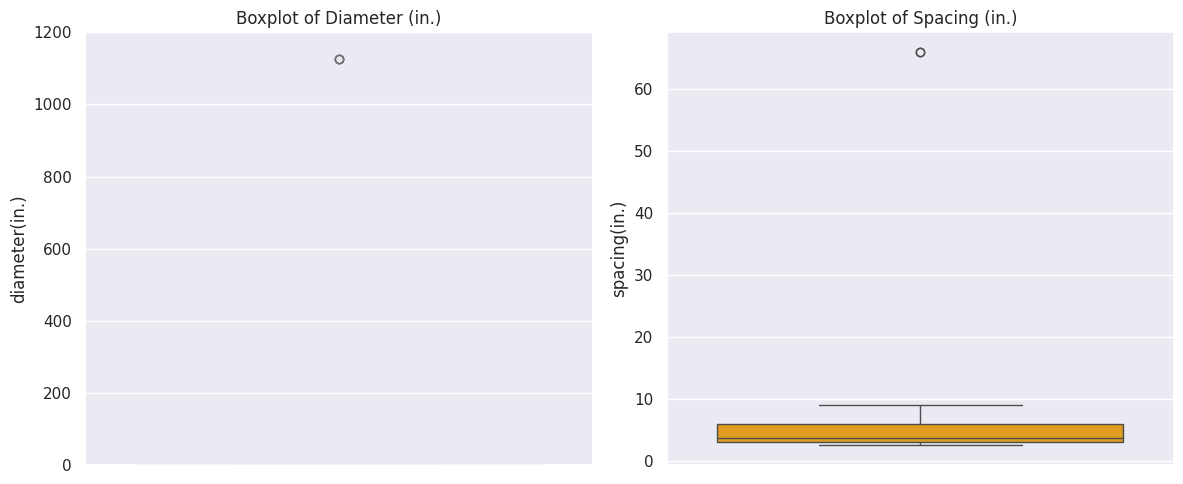

In [292]:
plt.figure(figsize=(12, 5))



# Boxplots for outliers

plt.subplot(1, 2, 1)

sns.boxplot(data=df, y='diameter(in.)', color='skyblue')

plt.title('Boxplot of Diameter (in.)')

plt.ylim(0, 1200)



plt.subplot(1, 2, 2)

sns.boxplot(data=df, y='spacing(in.)', color='orange')

plt.title('Boxplot of Spacing (in.)')



plt.tight_layout()

plt.show()


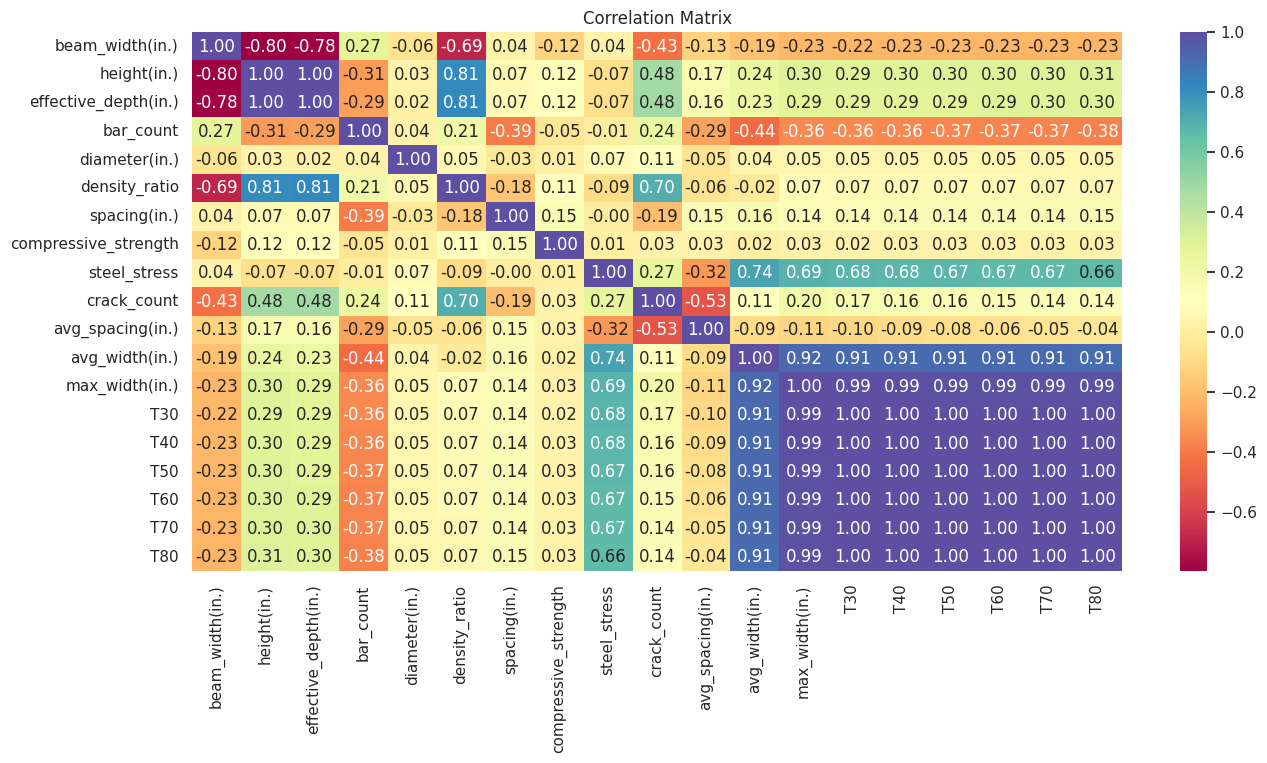

In [293]:
plt.figure(figsize=(15, 7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="Spectral", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

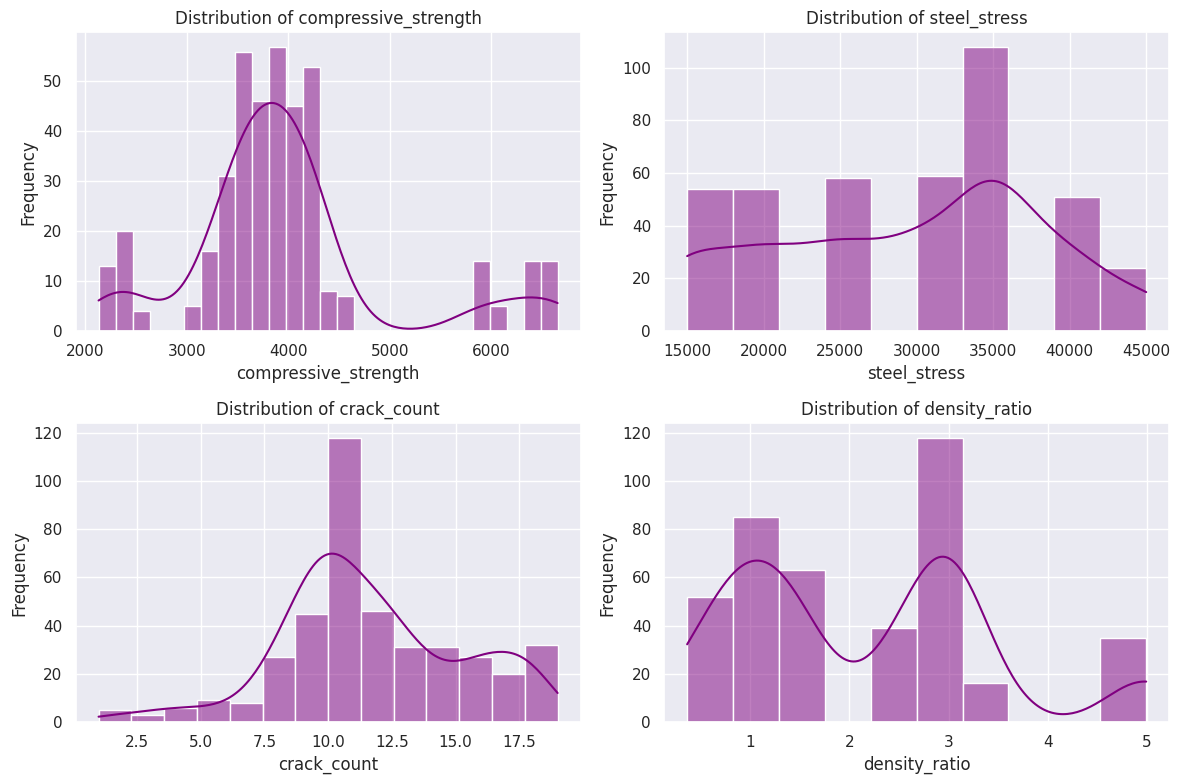

In [294]:
key_columns = ['compressive_strength', 'steel_stress', 'crack_count', 'density_ratio']



plt.figure(figsize=(12, 8))

for i, col in enumerate(key_columns, 1):

    plt.subplot(2, 2, i)

    sns.histplot(df[col], kde=True, color='purple')

    plt.title(f'Distribution of {col}')

    plt.xlabel(col)

    plt.ylabel('Frequency')



plt.tight_layout()

plt.show()

The boxplot for diameter(in.) shows an outlier around 1125. This is an error or a rare observation.
spacing(in.) has outliers above 30, with the majority of values concentrated below 10.

There is a strong positive correlation between compressive_strength and steel_stress(close to 0.9), these two metrics are closely related.
density_ratio shows some positive correlations with both strength metrics.
Temperature-related columns (30⁰C to 80⁰C) have high intercorrelations, suggesting consistent behavior across temperatures.

compressive_strength and shear_strength are slightly right-skewed, with a few high-value outliers.
crack_count has a relatively normal distribution but is centered around 11-12.
density_ratio is bimodal, showing two distinct material groups or conditions.

In [306]:
''' 
Q1_diameter = df['diameter(in.)'].quantile(0.25)

Q3_diameter = df['diameter(in.)'].quantile(0.75)

IQR_diameter = Q3_diameter - Q1_diameter

diameter_upper_limit = Q3_diameter + 1.5 * IQR_diameter



Q1_spacing = df['spacing(in.)'].quantile(0.25)

Q3_spacing = df['spacing(in.)'].quantile(0.75)

IQR_spacing = Q3_spacing - Q1_spacing

spacing_upper_limit = Q3_spacing + 1.5 * IQR_spacing


In [305]:
df.columns

Index(['beam_width(in.)', 'height(in.)', 'effective_depth(in.)', 'bar_count',
       'diameter(in.)', 'density_ratio', 'spacing(in.)',
       'compressive_strength', 'steel_stress', 'crack_count',
       'avg_spacing(in.)', 'avg_width(in.)', 'max_width(in.)', 'T30', 'T40',
       'T50', 'T60', 'T70', 'T80'],
      dtype='object')

In [296]:
df_cleaned = df[

    (df['diameter(in.)'] <= diameter_upper_limit) &

    (df['spacing(in.)'] <= spacing_upper_limit)

]


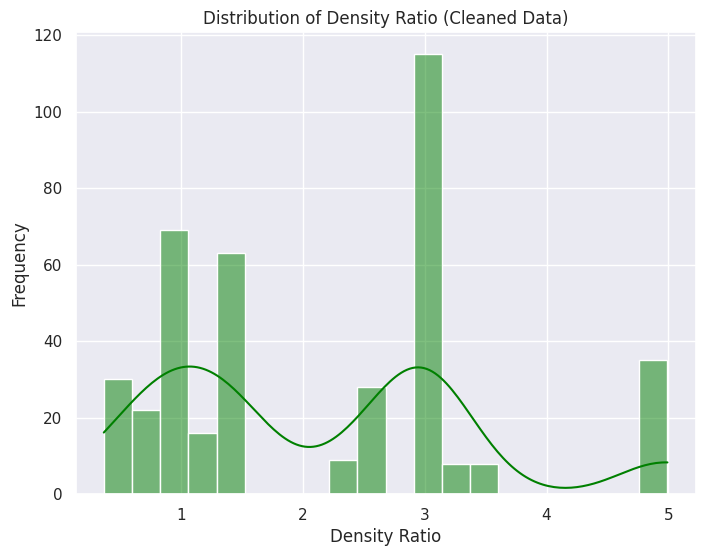

In [297]:
plt.figure(figsize=(8, 6))

sns.histplot(df_cleaned['density_ratio'], kde=True, color='green', bins=20)

plt.title('Distribution of Density Ratio (Cleaned Data)')

plt.xlabel('Density Ratio')

plt.ylabel('Frequency')

plt.show()



#

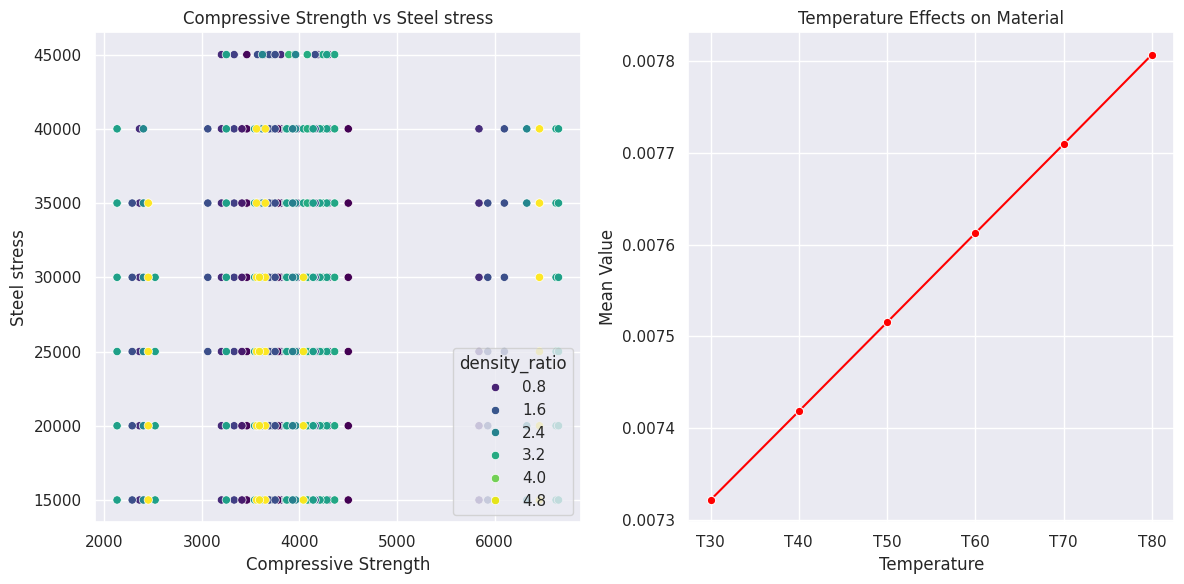

In [298]:
plt.figure(figsize=(12, 6))



# Scatterplot: compressive_strength vs. shear_strength

plt.subplot(1, 2, 1)

sns.scatterplot(data=df_cleaned, x='compressive_strength', y='steel_stress', hue='density_ratio', palette='viridis')

plt.title('Compressive Strength vs Steel stress')

plt.xlabel('Compressive Strength')

plt.ylabel('Steel stress')




temperature_cols = ['T30', 'T40', 'T50', 'T60', 'T70', 'T80']

temperature_means = df_cleaned[temperature_cols].mean()



plt.subplot(1, 2, 2)

sns.lineplot(x=temperature_cols, y=temperature_means, marker='o', color='red')

plt.title('Temperature Effects on Material')

plt.xlabel('Temperature')

plt.ylabel('Mean Value')



plt.tight_layout()

plt.show()

Outliers Removed
The bimodal distribution of density_ratio persists even after cleaning, showing two distinct material groups or conditions. This could warrant further investigation into whether these represent different material types, batches, or testing conditions.

There is a  strong positive relationship between compressive_strength and shear_strength. Data points grouped by density_ratio suggest denser materials tend to have higher strengths.

The line plot shows a steady increase in material property values with higher temperatures, supporting the hypothesis of thermal effects on material behavior.

In [299]:

model_data = df[[

    'steel_stress', 'effective_depth(in.)', 'beam_width(in.)', 'compressive_strength', 

    'density_ratio', 'avg_spacing(in.)', 'crack_count'

]].dropna




In [300]:
X = df[['steel_stress', 'effective_depth(in.)', 'beam_width(in.)', 'compressive_strength', 

                'density_ratio', 'avg_spacing(in.)']]

X_array = np.array(X, dtype=float)



# Calculate VIF for each variable

vif_data = pd.DataFrame()

vif_data['Variable'] = X.columns

vif_data['VIF'] = [variance_inflation_factor(X_array, i) for i in range(X_array.shape[1])]



vif_data

,Variable,VIF
0,steel_stress,12.210434
1,effective_depth(in.),20.018354
2,beam_width(in.),19.770805
3,compressive_strength,16.006973
4,density_ratio,12.894310
5,avg_spacing(in.),6.377123


Effective Depth: VIF = 20.02 (slightly high multicollinearity).
    Beam Width: VIF = 19.76.46 (slightly high multicollinearity).
    Compressive Strength: VIF = 16.02 (Moderate multicollinearity).
    Steel Stress and density Ratio: VIF values are above the acceptable threshold (~10).

In [301]:
model_data = df[['steel_stress', 'effective_depth(in.)', 'beam_width(in.)', 'compressive_strength', 'density_ratio', 'avg_spacing(in.)', 'crack_count']].dropna()


In [302]:
# To Address multicollinearity, I will be dropping the most collinear variables
# Dropping 'effective_depth' and 'beam_width' due to high VIF values

reduced_data = model_data.drop(columns=['effective_depth(in.)', 'beam_width(in.)'])

# Recalculate VIF for the reduced dataset
X_reduced = reduced_data[['steel_stress', 'compressive_strength', 
                                'density_ratio', 'avg_spacing(in.)']]
X_reduced_array = np.array(X_reduced, dtype=float)

vif_reduced = pd.DataFrame()
vif_reduced['Variable'] = X_reduced.columns
vif_reduced['VIF'] = [variance_inflation_factor(X_reduced_array, i) for i in range(X_reduced_array.shape[1])]

vif_reduced



,Variable,VIF
0,steel_stress,7.478940
1,compressive_strength,11.787321
2,density_ratio,3.634628
3,avg_spacing(in.),4.298430


In [303]:
X_final = X_reduced 

y = reduced_data['crack_count']



X_final_with_const = sm.add_constant(X_final)



# Fit the regression model

reg_model = sm.OLS(y, X_final_with_const).fit()



# Display the regression summary

reg_model_summary = reg_model.summary()

reg_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            crack_count   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     325.2
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.06e-124
Time:                        17:23:22   Log-Likelihood:                -803.62
No. Observations:                 408   AIC:                             1617.
Df Residuals:                     403   BIC:                             1637.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.7412      0.556     15.725      0.000       7.648       9.834
steel_stress          7.783e-05   1.03e-05      7.520      0.000    5.75e-05    9.82e-05
compressive_strength    -0.0001    8.8e-05     -1.352      0.177      -0.000     5.4e-05
density_ratio            1.9423      0.069     28.298      0.000       1.807       2.077
avg_spacing(in.)        -0.6455      0.039    -16.678      0.000      -0.722      -0.569
==============================================================================
Omnibus:                       53.229   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.812
Skew:                          -0.113   Prob(JB):                     6.90e-92
Kurtosis:                       7.964   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R² = 0.763: The model explains 76.3% of the variance in crack count.
    Adjusted R-squared (0.761): The model still performs well after accounting for the number of predictors.
F-statistic (325.2, p < 0.001): The model is statistically significant, at least one predictor is associated with crack count.

Constant (8.74128.7412): this is the  baseline crack count when all predictors are zero.
Steel Stress (7.783×10−57.783×10−5):
Positive and highly significant (p<0.001p<0.001).
Indicates that higher steel stress leads to an increase in crack count.

Compressive Strength (−0.0001−0.0001):

    Negative but not statistically significant (p=0.177p=0.177).
    Implies compressive strength might not have a strong independent effect on crack count.

Density Ratio (1.94231.9423):

    Strong positive relationship (p<0.001p<0.001).
    Suggests that higher reinforcement density leads to more cracks.

Average Spacing (−0.6455−0.6455):

    Significant negative relationship (p<0.001p<0.001).
    Suggests that wider spacing between cracks reduces their overall count.

Durbin-Watson (1.652): Suggests slight positive autocorrelation in residuals but not extreme.
    Omnibus Test (p < 0.001): Indicates non-normality in residuals, likely due to outliers or skewness.
    Condition Number (2.00e+05): High, which could indicate multicollinearity or scaling issues in predictors.

 Residual Behavior:

    Jarque-Bera (Prob < 0.001): Residuals deviate from a normal distribution, likely due to kurtosis (7.964).
    Skewness (-0.113): Slightly left-skewed but not severe.





Steel Stress, Density Ratio, and Average Spacing are strong predictors of crack count.
Compressive Strength does not significantly impact crack count in this model.


## Quadratic integration

In [318]:
temp_vars = ['T30', 'T40', 'T50', 'T60', 'T70', 'T80']

quadratic_temp_vars = [f"{var}^2" for var in temp_vars]

In [319]:
# Add quadratic terms to the dataset

for var, quad_var in zip(temp_vars, quadratic_temp_vars):

    df[quad_var] = df[var] ** 2

In [320]:
# Define independent variables with quadratic temperature integration

independent_vars_with_temp = ['steel_stress', 'effective_depth(in.)', 'beam_width(in.)',

                              'compressive_strength', 'density_ratio', 'avg_spacing(in.)'] + temp_vars + quadratic_temp_vars
dependent_var = 'crack_count'


In [321]:
# Split data into train test sets

X = df[independent_vars_with_temp]

y = df[dependent_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the quadratic integration regression model

model = LinearRegression()

model.fit(X_train, y_train)

# Predict on the test set

y_pred = model.predict(X_test)

# Evaluate model performance

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mse, r2


(1.8427027070699782, 0.8416793421712151)

Mean Squared Error (MSE): 1.843
R² Score: 0.842 (indicating that 84.2% of the variance in crack_count is explained by the model).

## power integration

In [317]:
# Create power-transformed temperature variables
power_temp_vars = [f"{var}^3" for var in temp_vars]

# Add the terms to the dataset
for var, power_var in zip(temp_vars, power_temp_vars):
    df[power_var] = df[var] ** 3

independent_vars_with_power = ['steel_stress', 'effective_depth(in.)', 'beam_width(in.)',
                               'compressive_strength', 'density_ratio', 'avg_spacing(in.)'] + temp_vars + power_temp_vars

# Split data into train and test sets
X_power = df[independent_vars_with_power]
X_train_power, X_test_power, y_train_power, y_test_power = train_test_split(X_power, y, test_size=0.2, random_state=42)

# Fit the model
model_power = LinearRegression()
model_power.fit(X_train_power, y_train_power)

# Predict on the test set
y_pred_power = model_power.predict(X_test_power)

# Evaluate model performance
mse_power = mean_squared_error(y_test_power, y_pred_power)
r2_power = r2_score(y_test_power, y_pred_power)

mse_power, r2_power


(2.9728901346525203, 0.7445763117593239)

Mean Squared Error (MSE): 2.014
R² Score: 0.827 (82.7% of the variance in crack_count is explained by the model).

The Quadratic Integration Model performs better, with a lower MSE and higher R².
This shows that quadratic transformations of temperature variables capture their influence on crack_count more effectively than power transformations.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

In [ ]:
predictors

In [ ]:
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

###Test for multicolinearity


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif
checking_vif(X_train)

##Removing colinearity


In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ['80?C','? ratio','Avg . Width ( In . )']

res = treating_multicollinearity(X_train, y_train, col_list)
res

In [ ]:
col_to_drop = "80?C"
X_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train2)
print("VIF after dropping ", col_to_drop)
vif

In [ ]:
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(olsres_1.summary())

In [ ]:
# initial list of columns
predictors = X_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, X_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [ ]:
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2= olsmod_2.fit()
print(olsres_2.summary())

In [ ]:
df1_pred = pd.DataFrame()

df1_pred["Actual Values"] = y_train.values.flatten()  # actual values
df1_pred["Fitted Values"] = olsres_2.fittedvalues.values  # predicted values
df1_pred["Residuals"] = olsres_2.resid.values  # residuals

df1_pred.head()

In [ ]:
sns.set_style("whitegrid")
sns.residplot(
    data=df1_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.residplot(
    data=df1_pred, x="Actual Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Actual vs Residual plot")
plt.show()

In [ ]:
sns.histplot(df1_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()